In [1]:
# Import
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, MWETokenizer

### Load Dataframe

In [2]:
# Load JSON
database_path = "../data/data.json"
data = pd.read_json(database_path)
# Select the columns needed for hard/soft skills analysis
data=data[['id','description', 'description_tokens']]
# Preview the Data
data.head()

,id,description,description_tokens
0,1,Open to work on W2 or on Corp-to-Corp (for vis...,"['qlik', 'power_bi', 'power_bi']"
1,2,Talentify helps candidates around the world to...,['excel']
2,3,"At Edward Jones, we help clients achieve their...","['sas', 'snowflake', 'excel', 'power_bi', 'pyt..."
3,4,Position Title\nPosition Number\nLocation...\n...,"['excel', 'tableau', 'cognos', 'sql', 'word']"
4,5,Scope of Position\n\nThe Pre-Construction Esti...,"['pandas', 'sql', 'tableau', 'word', 'power_bi..."


### Hard Skills Bar Chart

In [3]:
# Create dataframe for plotting showing the number and the percentage of job postings mentioning about each hard skills
# count skill frequency from 'description_tokens' column
hs_freq = data['description_tokens'].str.split(r'[,\ \'\[\]]',expand=True).stack().value_counts()
hs_freq = hs_freq.drop(hs_freq.index[0])

# create dataframe for skill frequency plot (TOP 10 SKILLS)
hs_freq_df = hs_freq.to_frame().reset_index()
hs_freq_df.rename(columns = {'index':'hard_skills', 0:'count'}, inplace = True)

# Add a 'percentage' colomn showing the percentage of the job postings mentions about each job skills.
hs_perct = hs_freq_df['count']/len(data['id'])*100
hs_freq_df['hard_perct (%)']= hs_perct
hs_top_10_df = hs_freq_df.iloc[0:10]
hs_top_10_df

,hard_skills,count,hard_perct (%)
0,sql,5581,53.167572
1,excel,3764,35.857864
2,tableau,3077,29.313137
3,python,2955,28.150900
4,power_bi,2823,26.893398
5,r,1991,18.967324
6,sas,1134,10.803087
7,powerpoint,829,7.897495
8,word,787,7.497380
9,snowflake,761,7.249690


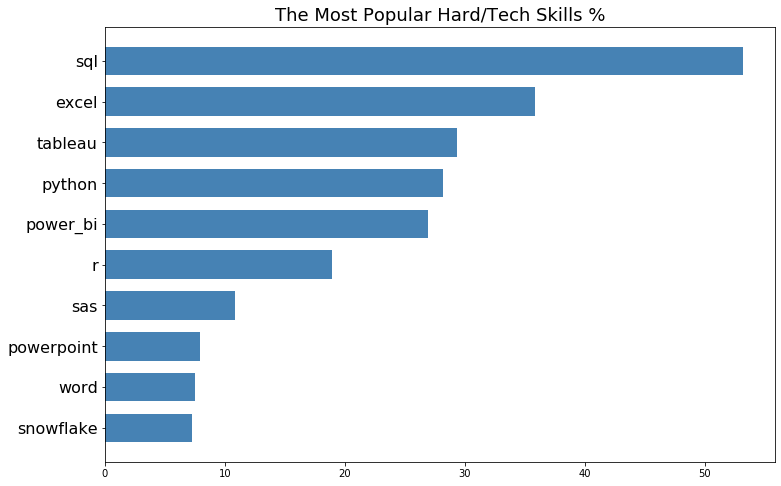

In [11]:
# Plot horizontal bar chart based on top 10 hard skills mentioend in the job posting.
# reverse the ranking
rev_hs_skill_top_10_df = hs_top_10_df.iloc[::-1]
y_axis = rev_hs_skill_top_10_df['hard_skills']
x_axis = rev_hs_skill_top_10_df['hard_perct (%)']
# labels = reversed_skill_top_10_df['percentage']
plt.figure(figsize = (12,8))
plt.barh(y_axis, x_axis, height=0.7, color="steelblue")
plt.title('The Most Popular Hard/Tech Skills %', fontsize=18)
plt.yticks(fontsize=16)
#plt.savefig('../images/hard_skill_bar.png')
plt.show()

### Soft Skills Bar Chart

In [5]:
# Use ChatGPT generated a list of 100 most popular softskills in data anlyst job posting.
softskill_keywords_all = ['communication','active_listening','writing','public_speaking','interpersonal_skills',\
'empathy','conflict_resolution','teamwork','collaboration','leadership','decision_making','problem_solving',\
'time_management','organized','attention_to_detail','creativity','adaptability','flexibility','resilience',\
'patience','positive_attitude','self_motivation','initiative','drive','accountability','responsibility',\
'trustworthiness','honesty','integrity','reliability','professionalism','cultural_sensitivity','diversity_and_inclusion',\
'networking','building_relationships','emotional_intelligence','critical_thinking','analytical skills','research_skills',\
'strategic_thinking','innovation','curiosity','learning_agility','risk_taking','negotiation','sales_skills','customer_service',\
'conflict_management','adaptation_to_change','coaching', 'mentoring','delegation','goal_setting',\
'customer_orientation','service_excellence','consensus_building','persuasion','creative_thinking','data_analysis',\
'detail_orientation','diplomacy','discretion','entrepreneurship','fiscal responsibility','foresight','cultural_awareness',\
'humility','influence','interpersonal_communication','intuition','judgment','logical_thinking','marketing_skills','multitasking',\
'oral_communication','organizational_skills','persuasiveness','presentation_skills','problem_solving skills','relationship_building',\
'resourcefulness','risk_management','salesmanship','self_awareness','self_discipline','self_esteem','self_management','social_awareness',\
'social_intelligence','strategic_planning','stress_management','time_management skills','tolerance','transparency',\
'understanding_of_group_dynamics','understanding_of_human_behavior','understanding_of_motivation','verbal_communication','vision','work_ethic']

# get a list of multi-word expression
MWE_list = []
for kw in softskill_keywords_all:
    temp = kw.split("_")
    if len(temp) == 1:
        continue
    MWE_list.append(tuple(temp))

print(MWE_list)

[('active', 'listening'), ('public', 'speaking'), ('interpersonal', 'skills'), ('conflict', 'resolution'), ('decision', 'making'), ('problem', 'solving'), ('time', 'management'), ('attention', 'to', 'detail'), ('positive', 'attitude'), ('self', 'motivation'), ('cultural', 'sensitivity'), ('diversity', 'and', 'inclusion'), ('building', 'relationships'), ('emotional', 'intelligence'), ('critical', 'thinking'), ('research', 'skills'), ('strategic', 'thinking'), ('learning', 'agility'), ('risk', 'taking'), ('sales', 'skills'), ('customer', 'service'), ('conflict', 'management'), ('adaptation', 'to', 'change'), ('goal', 'setting'), ('customer', 'orientation'), ('service', 'excellence'), ('consensus', 'building'), ('creative', 'thinking'), ('data', 'analysis'), ('detail', 'orientation'), ('cultural', 'awareness'), ('interpersonal', 'communication'), ('logical', 'thinking'), ('marketing', 'skills'), ('oral', 'communication'), ('organizational', 'skills'), ('presentation', 'skills'), ('problem

In [6]:
# create new column 'softskills_token' for tokenized soft skills
data['softskills_token'] = ""
for index, row in data.iterrows():
    # lowercase words
    detail = row.description.lower()
    # tokenize words
    detail = word_tokenize(detail)
    # handle multi-word tokenization
    tokenizer = MWETokenizer(MWE_list)
    detail = tokenizer.tokenize(detail)
    # remove duplicates
    detail = list(set(detail))
    # ChatGPT provided a list of most popular softskills in data anlyst job posting, going through description colomn and keep the word mentioend in the popular list.
    detail = [word for word in detail if word in softskill_keywords_all] 
    # add to details list
    data.loc[index, 'softskills_token'] = str(detail)

data.head()

,id,description,description_tokens,softskills_token
0,1,Open to work on W2 or on Corp-to-Corp (for vis...,"['qlik', 'power_bi', 'power_bi']","['writing', 'attention_to_detail', 'data_analy..."
1,2,Talentify helps candidates around the world to...,['excel'],"['critical_thinking', 'integrity', 'coaching',..."
2,3,"At Edward Jones, we help clients achieve their...","['sas', 'snowflake', 'excel', 'power_bi', 'pyt...","['critical_thinking', 'data_analysis', 'drive'..."
3,4,Position Title\nPosition Number\nLocation...\n...,"['excel', 'tableau', 'cognos', 'sql', 'word']","['data_analysis', 'integrity', 'customer_servi..."
4,5,Scope of Position\n\nThe Pre-Construction Esti...,"['pandas', 'sql', 'tableau', 'word', 'power_bi...","['teamwork', 'organizational_skills', 'attenti..."


In [7]:
# Create dataframe for plotting showing the popular soft skills and the percentage of job postings mentioning about each soft skills
# count skill frequency from 'softskills_token' column
ss_freq = data['softskills_token'].str.split(r'[,\ \'\[\]]',expand=True).stack().value_counts()
ss_freq = ss_freq.drop(ss_freq.index[0])

# create dataframe for skill frequency plot (TOP 15 SKILLS)
ss_freq_df = ss_freq.to_frame().reset_index()
ss_freq_df.rename(columns = {'index':'soft_skills', 0:'count'}, inplace = True)

# Add a 'percentage' colomn showing the percentage of the job postings mentions about each job skills.
soft_skill_perct = ss_freq_df['count']/len(data['id'])*100
ss_freq_df['soft_perct (%)']= soft_skill_perct
ss_top_15_df = ss_freq_df.iloc[0:15]
ss_top_15_df

,soft_skills,count,soft_perct (%)
0,data_analysis,3816,36.353244
1,communication,3766,35.876917
2,drive,2927,27.884157
3,leadership,2779,26.474231
4,vision,2492,23.740116
5,attention_to_detail,1453,13.842050
6,writing,1366,13.013242
7,integrity,1251,11.917691
8,collaboration,1030,9.812327
9,innovation,1021,9.726589


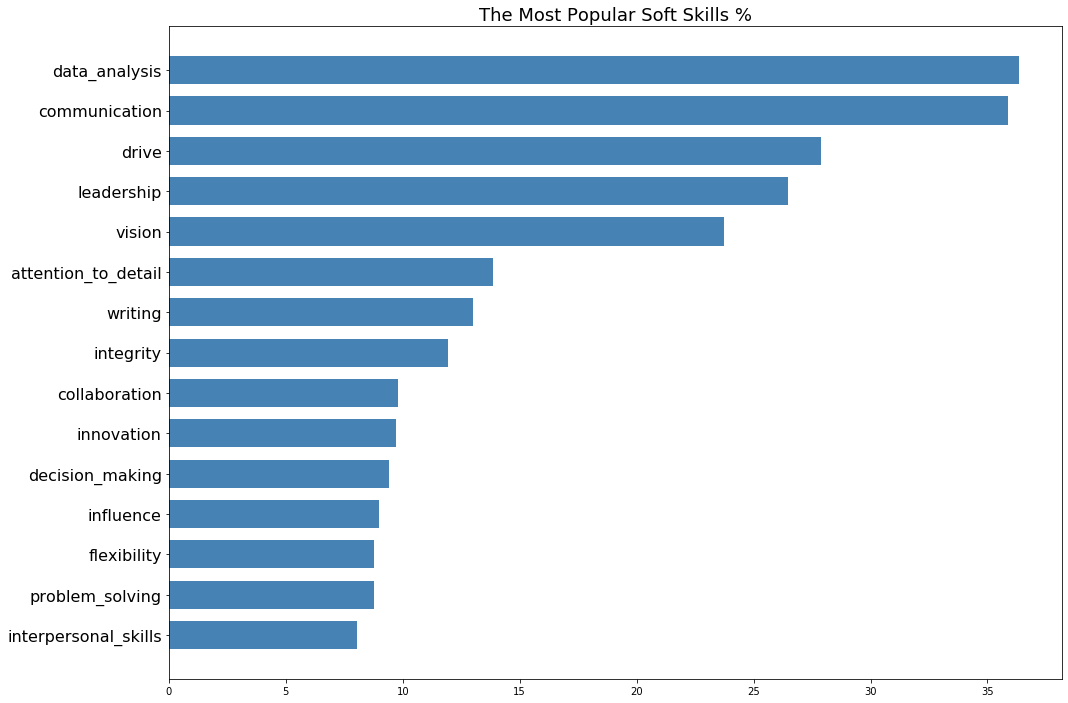

In [8]:
# Plot horizontal bar chart based on top 10 skills mentioend in the job posting following with a dataframe shows the ranking from 10-15.
# reverse the ranking
rev_ss_top_15_df = ss_top_15_df.iloc[::-1]
y_axis = rev_ss_top_15_df['soft_skills']
x_axis = rev_ss_top_15_df['soft_perct (%)']
# labels = reversed_skill_top_15_df['percentage']
plt.figure(figsize=(16,12))
plt.barh(y_axis, x_axis, height=0.7, color="steelblue")
plt.title('The Most Popular Soft Skills %', fontsize=18)
plt.yticks(fontsize=16)
#plt.savefig('../images/soft_skill_bar.png',bbox_inches = 'tight')
plt.show()

### WordCloud

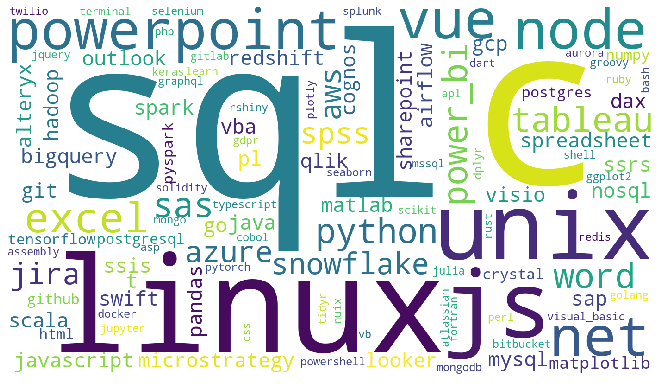

In [9]:
# Word cloud on hard skills 
# Imported wordcloud to generate wordcloud graph based on 'hard skills' column.

comment_words = ''
 
# iterate through the 'hard_skills'column
for val in hs_freq_df['hard_skills']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1400, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (9, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()
# save the image
#wordcloud.to_file('../images/hard_skill_wordcloud.png')

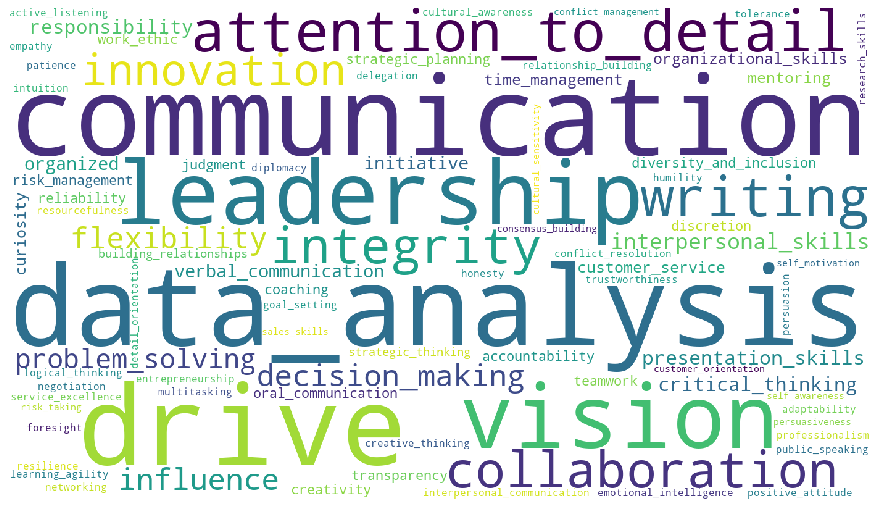

In [10]:
# Word cloud on soft skills 
# Imported wordcloud to generate wordcloud graph based on 'soft skills' column.
comment_words = ''
 
# iterate through the 'soft_skills'column
for val in ss_freq_df['soft_skills']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1400, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()
# save the image
#wordcloud.to_file('../images/hard_skill_wordcloud.png')